# Assignment #3
[30 points]

[Github link](https://github.com/arbi11/YCBS-272/blob/Assignment-3/Assignment_3.ipynb)
## TASK 1: Descriptive Statistics
This assignment consists of 2 parts

* Data Analysis & Model Training [20 points]
* Prediction Accuracy [5 points]
 
 

---


For 'Data Analysis & Model Training' the task is to perform explorartory data analysis, identify anomalies or missing values and finally train a model of your choice for prediction.
 
 

---


 
 For the second part in descriptive statistics, you are competing agaist your batchmates in teams. In this case, the team receiving the highest accuracy will be the winner and will score the maximum grade associated in this category. Others will be garded on percentile basis.
 
Rules for submission:
* You can submit your entry on mycourses under 'Assignment 3'
* You can only make 5 submissions.
* Each submission should be accompanied with a screenshot of the accuracy value and the corresponding .ipynb notebook.
* At the end of 3 hours, download the .pynb file from colab and submit again on mycourses.
* You can also mail me the notebook at arbaaz.khan@mail.mcgill.ca
---
## TASK 2: Inference Statistics

[5 points]

You also have a set of questions from Inference statistics which you have to solve as well in a team.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import pydot
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## [TASK 1] Desciptive Stat Task

### initialize work

In [2]:
! git clone https://github.com/arbi11/YCBS-272.git
! ls

fatal: destination path 'YCBS-272' already exists and is not an empty directory.
sample_data  YCBS-272


In [3]:
! git checkout Assignment-3

fatal: not a git repository (or any of the parent directories): .git


In [4]:
import os
os.chdir('YCBS-272')
! ls

Advertising.csv
Assignment_3_classification_task.csv
Auto.csv
Cartwheeldata.csv
drinks.csv
fandango_score_comparison.csv
indian_liver_patient.csv
Lec_2.ipynb
Lec_2_solution.ipynb
Lec_4_1.ipynb
Lec_4_2.ipynb
Lec_4_3.ipynb
Lec_4_4.ipynb
Lec_4_5.ipynb
Lec_4_6.ipynb
Lec_5_Lesson.ipynb
Lec_5_Solution.ipynb
Lec_6_decision_trees.ipynb
Lec_8_1.ipynb
Lec_8_2_1_Confidence_Intervals.ipynb
Lec_9_1_Introduction_to_Hypothesis_Testing_in_Python.ipynb
Lec_9_2_NHANES_Hypothesis_Testing.ipynb
nap_no_nap.csv
nhanes_2015_2016.csv
Quiz_2.ipynb
README.md
spamdata.csv
tree2.dot
tree.dot
Tree_Exercise.ipynb
YCBS_272_Assignment_1.ipynb
YCBS_272_Assignment_2.ipynb


In [5]:
!wget https://raw.githubusercontent.com/arbi11/YCBS-272/Assignment-3/Assignment_3_classification_task.csv

--2019-08-09 14:35:59--  https://raw.githubusercontent.com/arbi11/YCBS-272/Assignment-3/Assignment_3_classification_task.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11372 (11K) [text/plain]
Saving to: ‘Assignment_3_classification_task.csv.1’

Assignment_3_classi 100%[===================>]  11.11K  --.-KB/s    in 0s      

2019-08-09 14:35:59 (99.9 MB/s) - ‘Assignment_3_classification_task.csv.1’ saved [11372/11372]



In [0]:
import pandas as pd
# Reading the data
df = pd.read_csv("Assignment_3_classification_task.csv")

### Perform the TASK 1 as specified above

#### describe & analyze the data

In [7]:
df.describe()

,age,sex,chest_pain_type,t_rest_bps,cholestoral,fast_blood_sugar,rest_ecg,max_heat_rate,ex_ang,old_peak,slope,ca,thal,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                 303 non-null int64
sex                 303 non-null int64
chest_pain_type     303 non-null int64
t_rest_bps          303 non-null int64
cholestoral         303 non-null int64
fast_blood_sugar    303 non-null int64
rest_ecg            303 non-null int64
max_heat_rate       303 non-null int64
ex_ang              303 non-null int64
old_peak            303 non-null float64
slope               303 non-null int64
ca                  303 non-null int64
thal                303 non-null int64
Target              303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
df.head(1)

,age,sex,chest_pain_type,t_rest_bps,cholestoral,fast_blood_sugar,rest_ecg,max_heat_rate,ex_ang,old_peak,slope,ca,thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26ce6ec080>,
      dtype=object)

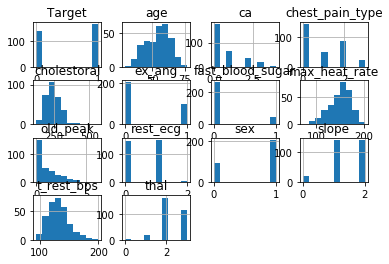

In [10]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26cb999780>,
      dtype=object)

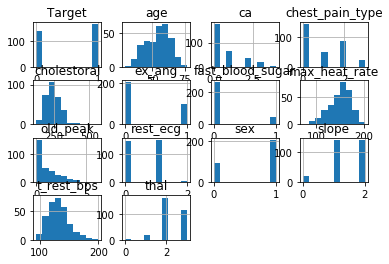

In [11]:
df.hist()

In [12]:
df.corr()

,age,sex,chest_pain_type,t_rest_bps,cholestoral,fast_blood_sugar,rest_ecg,max_heat_rate,ex_ang,old_peak,slope,ca,thal,Target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain_type,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
t_rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestoral,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fast_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heat_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
ex_ang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [13]:
df.isnull().any()

age                 False
sex                 False
chest_pain_type     False
t_rest_bps          False
cholestoral         False
fast_blood_sugar    False
rest_ecg            False
max_heat_rate       False
ex_ang              False
old_peak            False
slope               False
ca                  False
thal                False
Target              False
dtype: bool

#### prepare for the train and test data

In [0]:
X=df.drop("Target",axis=1).copy()
Y=df.Target.copy()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

#### the traditional decision tree method

In [16]:
model=DecisionTreeClassifier(max_depth=6,random_state=1,min_samples_leaf=5)
model.fit(X_train,Y_train) 
y_predict=model.predict(X_test)
print(accuracy_score(Y_test,y_predict))

0.9354838709677419


In [17]:
cm = pd.DataFrame(confusion_matrix(Y_test, y_predict).T, 
                  index = ['No', 'Yes'], 
                  columns = ['No', 'Yes'])
print(cm)

     No  Yes
No   14    1
Yes   1   15


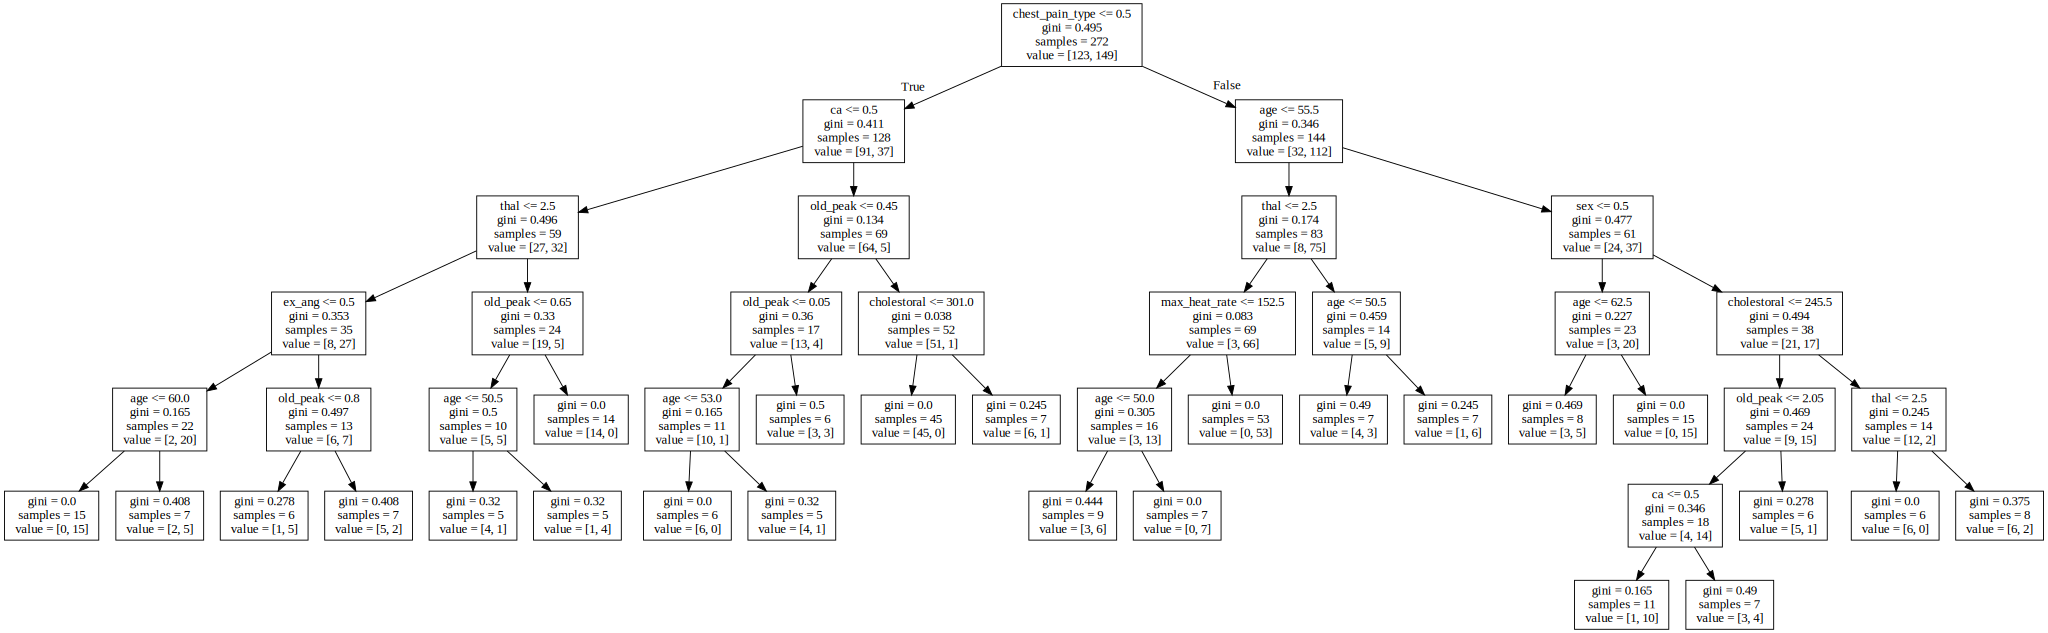

In [18]:
export_graphviz(model, 
                out_file = "tree.dot", 
                feature_names = X_train.columns,
                )

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### Try xgboost methods

In [0]:
from xgboost import XGBClassifier

In [20]:
model3 = XGBClassifier(max_depth=1,n_estimators=29)
model3.fit(X_train, Y_train)
y_predict = model3.predict(X_test)
test3=accuracy_score(Y_test, y_predict)
print(test3)

0.967741935483871


## [TASK 2] Inference Stat

### Confidence intervals case study using NHANES data

In this section, we demonstrate the construction of confidence intervals for the proportion of people who smoke. The specific definition of "smoker" used here (SMQ020) identifies a person as being a smoker if they self-report as having smoked 100 or more cigarettes in their lifetime. 

Check this reference for more details: https://wwwn.cdc.gov/nchs/nhanes/search/default.aspx


In [0]:
import scipy.stats as st

In [0]:
da = pd.read_csv("nhanes_2015_2016.csv")

First  the numeric codes in the variables of interest are replaced with text labels, and set the rare answers other than "yes" and "no" to be missing (so they will automatically be omitted from all the analyses below).

In [0]:
import numpy as np
da["SMQ020x"] = da.SMQ020.replace({1: 1, 2:0, 7: np.nan, 9: np.nan})  # np.nan represents a missing value
da["RIAGENDRx"] = da.RIAGENDR.replace({1: 1, 2:-1})

In [54]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'SMQ020x', 'RIAGENDRx'],
      dtype='object')

### [1]  You are required to calculate the 95% confidence interval for proportions of smokers separately for females and for males. 

[2 points]

#### male

In [55]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,SMQ020x,RIAGENDRx
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,1.0,1
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,1.0,1
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,1.0,1
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,0.0,-1
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,0.0,-1


In [56]:
male=da[da["RIAGENDRx"]==1]["SMQ020x"].copy()
male.head()

0    1.0
1    1.0
2    1.0
6    1.0
8    0.0
Name: SMQ020x, dtype: float64

In [63]:
pmale=np.mean(male)

0.5132582637123139

In [64]:
pvalue=1.96*np.sqrt(pmale*(1-pmale)/len(male))

0.018650801066375452

In [66]:
print("("+str(pmale-pvalue)+" , "+str(pmale+pvalue)+")")

(0.4946074626459384 , 0.5319090647786893)


#### female

In [59]:
female=da[da["RIAGENDRx"]==-1]["SMQ020x"].copy()
female.head()

3     0.0
4     0.0
5     0.0
7     0.0
12    1.0
Name: SMQ020x, dtype: float64

In [0]:
pfemale=np.mean(female)
pfemalevalue=1.96*np.sqrt(pfemale*(1-pfemale)/len(female))

In [68]:
print("("+str(pfemale-pfemalevalue)+" , "+str(pfemale+pfemalevalue)+")")

(0.28830581027959534 , 0.3213846338657613)


### [2] Confidence intervals comparing two independent proportions of male vs female smokers


1.   Define the parameter of interest for the difference between the proprotion of females who smoke and the proportion of males who smoke.
2.   Calculate the best estimate

1.    Calculate the standard error. 

2.   Second, construct a 95% confidence interval for the difference in proportions for female and male smokers.

[3 points]



In [0]:
s1=np.std(male)
n1=len(male)
m1=pmale
s2=np.std(female)
n2=len(female)
m2=pfemale
sp=np.sqrt(((n1-1)*s1*s1+(n2-1)*s2*s2)/n1+n2-2)
temp=np.sqrt(1/n1+1/n2)

In [75]:
print("("+str(m1-m2-1.96*sp*temp)+" , "+str(m1-m2+1.96*sp*temp)+")")

(-2.616700239462651 , 3.033526322741922)
